In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
from ifs import *
from maps import *
from utils import *

In [3]:
def simple_demo(translations):
    sims = []
    for t in translations:
        sim = Similitude(0.5, construct_rotation_2d(0), t)
        sims.append(sim)
    return sims

In [4]:
ts = [np.array([0.0, 0.5]),np.array([0.5, -0.5]), np.array([-0.5, -0.5])]

In [5]:
demo_maps =simple_demo(ts)

In [6]:
weights = np.array([1,1,1])
weights = weights / sum(weights)

In [7]:
out = generate_ifs(demo_maps, weights, 4, 10000)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


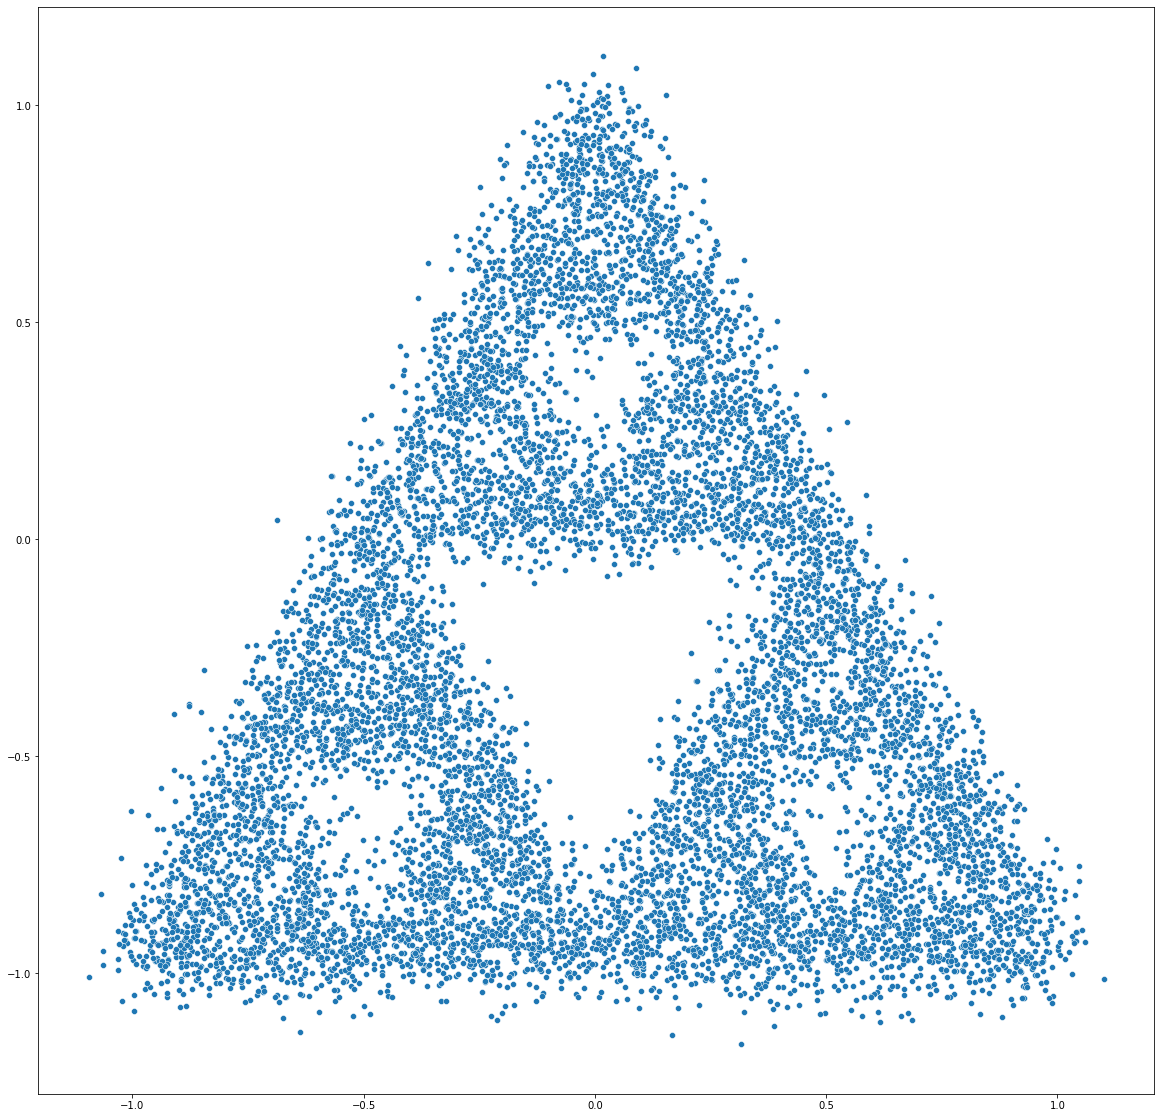

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(out[:,0], out[:,1])

In [9]:
from em import EM

In [10]:
model = EM(num_components = 3, depth = 4)

In [350]:
model.post_transform = demo_maps[0]

In [13]:
model.train(out)

TypeError: list indices must be integers or slices, not list

In [11]:
p, pks, scalars, translations = model.e_step(out)

AttributeError: 'NoneType' object has no attribute 'invert'

In [356]:
(p @ np.ones((p.shape[1],)) == np.ones((p.shape[0],))).all()

False